# Basic Image Enhancement Using Bitwise Operations
* AND
* OR

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

**Bitwise Operations**
* cv2.bitwise_or()
* cv2.bitwise_and()
* cv2.bitwise_xor(
* cv2.bitwise_not()

dst = cv2.bitwise_and(src1, src2, dst, mask)
* src1: first input array or a scalar
* src2: second input array or a scalar
* mask: optinal operation mask, 8-bit single channel array, that specifies elements of the output array to be changed

(200, 499)


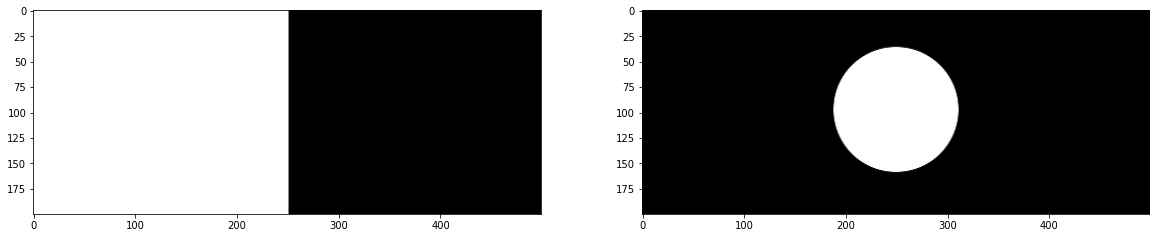

In [5]:
img_rec = cv2.imread("rectangle.jpg",cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (20,5))
plt.subplot(121); plt.imshow(img_rec,cmap = 'gray')
plt.subplot(122); plt.imshow(img_cir,cmap = 'gray')
print(img_rec.shape)

**Bitwise AND operator**

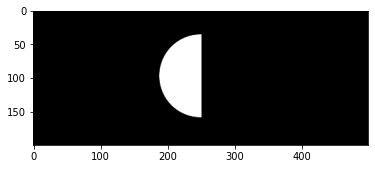

In [8]:
result = cv2.bitwise_and(img_rec,img_cir)
plt.imshow(result,cmap = 'gray')

**Bitwise OR operator**

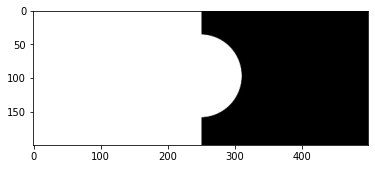

In [15]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result, cmap = 'gray')

**Bitwise XOR operator**

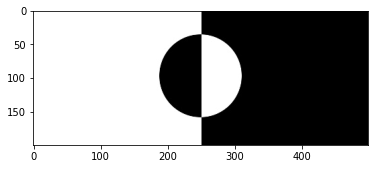

In [17]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result, cmap = 'gray')

**Application: Logo Manipulation**?

(700, 700, 3)


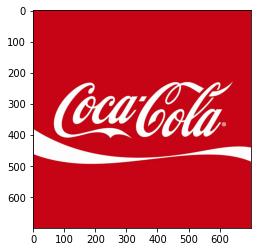

In [2]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

**Read Background image**

(1800, 1800, 3)
(700, 700, 3)


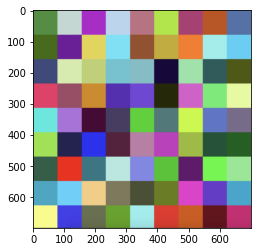

In [6]:
# Checkerboard background
img_bground_bgr= cv2.imread("checkerboard_color.png")
img_bground_rgb = cv2.cvtColor(img_bground_bgr, cv2.COLOR_BGR2RGB)
print(img_bground_rgb.shape)
#Resise imgae (700,700,3)
ratio = logo_w/img_bground_rgb.shape[0]
dim  = (logo_w, int(img_bground_rgb.shape[0]*ratio))
img_bground_rgb = cv2.resize(img_bground_rgb,dim, interpolation = cv2.INTER_AREA)
plt.imshow(img_bground_rgb)
print(img_bground_rgb.shape)

**Create Mask for original Image**


(700, 700)


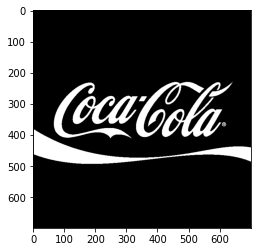

In [16]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
#create a binary mask
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_mask,cmap = 'gray')
print(img_mask.shape)

**Invert the Mask**

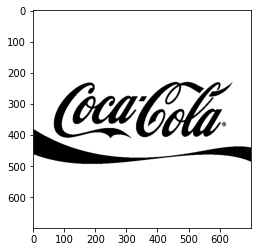

In [18]:
#Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap = 'gray')

**Apply background on the Mask**

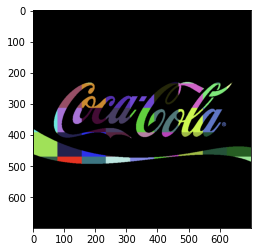

In [19]:
#Create colorful background behind the logo lettering
img_background = cv2.bitwise_and(img_bground_rgb,img_bground_rgb, mask = img_mask)
plt.imshow(img_background)

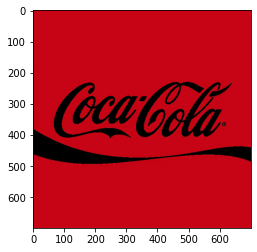

In [20]:
#Isolate foreground from image (Co lap nen hinh anh)
img_foreground = cv2.bitwise_and(img_rgb,img_rgb,mask = img_mask_inv)
plt.imshow(img_foreground)

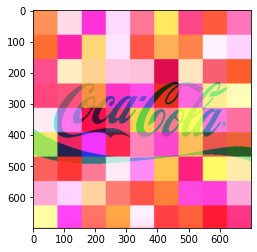

In [23]:
#Merge Foreground and Background
# Ket hop tien canh voi hau canh
result = cv2.add(img_bground_rgb, img_foreground)
plt.imshow(result)